In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/user/Downloads/DigitalGreen"
train = pd.read_csv(path+"/Train.csv")
test = pd.read_csv(path+"/Test.csv")

In [3]:
# concatenating both train and test data for ease in cleaning
data = pd.concat([train,test], axis=0)

In [4]:
data.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,...,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600.0
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,...,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600.0
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,...,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225.0
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,...,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468.0
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,...,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550.0


In [5]:
#Since the test lacks the Yield column,fill with the na
data["Yield"].fillna(0, inplace=True) 

In [6]:
data.shape

(5160, 44)

In [7]:
data.isnull().sum()

ID                                       0
District                                 0
Block                                    0
CultLand                                 0
CropCultLand                             0
LandPreparationMethod                    0
CropTillageDate                          0
CropTillageDepth                         0
CropEstMethod                            0
RcNursEstDate                          126
SeedingSowingTransplanting               0
SeedlingsPerPit                        392
NursDetFactor                          392
TransDetFactor                         392
TransplantingIrrigationHours           270
TransplantingIrrigationSource          161
TransplantingIrrigationPowerSource     674
TransIrriCost                         1199
StandingWater                          317
OrgFertilizers                        1750
Ganaura                               3212
CropOrgFYM                            3542
PCropSolidOrgFertAppMethod            1753
NoFertilize

In [8]:
data.dtypes

ID                                     object
District                               object
Block                                  object
CultLand                                int64
CropCultLand                            int64
LandPreparationMethod                  object
CropTillageDate                        object
CropTillageDepth                        int64
CropEstMethod                          object
RcNursEstDate                          object
SeedingSowingTransplanting             object
SeedlingsPerPit                       float64
NursDetFactor                          object
TransDetFactor                         object
TransplantingIrrigationHours          float64
TransplantingIrrigationSource          object
TransplantingIrrigationPowerSource     object
TransIrriCost                         float64
StandingWater                         float64
OrgFertilizers                         object
Ganaura                               float64
CropOrgFYM                        

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CultLand,5160.0,28.695736,29.108989,1.000000,12.00000,20.000000,36.00000,800.0000
CropCultLand,5160.0,24.929845,26.896197,1.000000,10.00000,20.000000,30.00000,800.0000
CropTillageDepth,5160.0,4.474806,1.134895,1.000000,4.00000,4.000000,5.00000,8.0000
SeedlingsPerPit,4768.0,2.679530,6.686518,1.000000,2.00000,2.000000,3.00000,442.0000
TransplantingIrrigationHours,4890.0,8.100613,41.311969,1.000000,2.00000,4.000000,6.00000,2000.0000
TransIrriCost,3961.0,385.939662,424.943656,1.000000,150.00000,250.000000,450.00000,6000.0000
StandingWater,4843.0,3.252529,2.215476,1.000000,2.00000,3.000000,4.00000,20.0000
Ganaura,1948.0,29.366016,121.052018,1.000000,1.00000,3.000000,4.00000,1400.0000
CropOrgFYM,1618.0,62.481459,340.507710,1.000000,1.00000,2.000000,5.00000,4000.0000
NoFertilizerAppln,5160.0,2.191667,0.634268,1.000000,2.00000,2.000000,3.00000,4.0000


In [11]:
df = data.copy()

In [12]:
def impute_checker(feature, imputed_df, title):
     df[feature].plot(kind='kde', c='black')
     imputed_df[feature].plot(kind='kde', style = "--", c= 'green')
     labels = ['Original df', 'Imputed df']
     plt.legend(labels)
     plt.xlabel(feature)
     plt.title(title)
     plt.show()

In [13]:
numerical_columns =["SeedlingsPerPit","TransplantingIrrigationHours","TransIrriCost",
                    "StandingWater","Ganaura","CropOrgFYM","NoFertilizerAppln","BasalDAP",
                    "BasalUrea","1tdUrea","1appDaysUrea","2tdUrea","2appDaysUrea","Harv_hand_rent"]

for col in numerical_columns:
     df[col].fillna(df[col].mean())

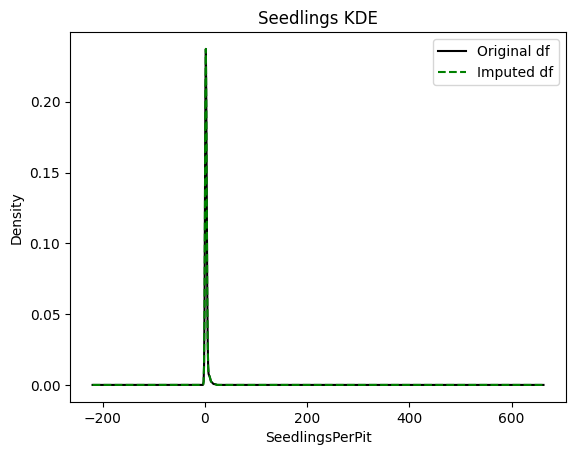

In [14]:
# imputing the seedlingsPerPit with mean is superb 
impute_checker("SeedlingsPerPit", df, "Seedlings KDE")

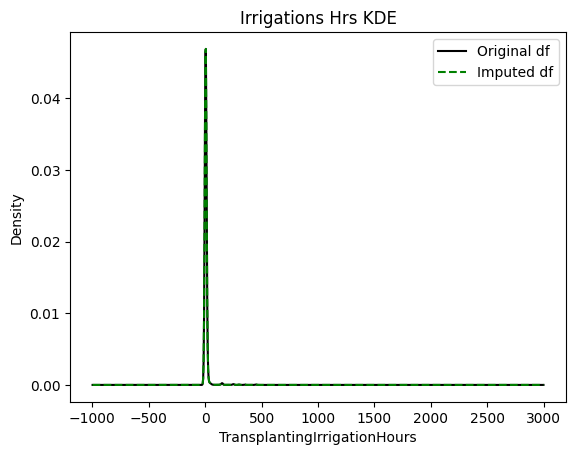

In [15]:
impute_checker("TransplantingIrrigationHours", df, "Irrigations Hrs KDE")

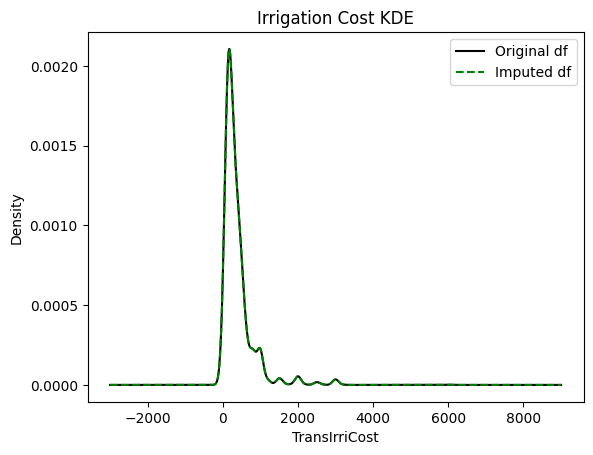

In [16]:
impute_checker("TransIrriCost", df, "Irrigation Cost KDE")

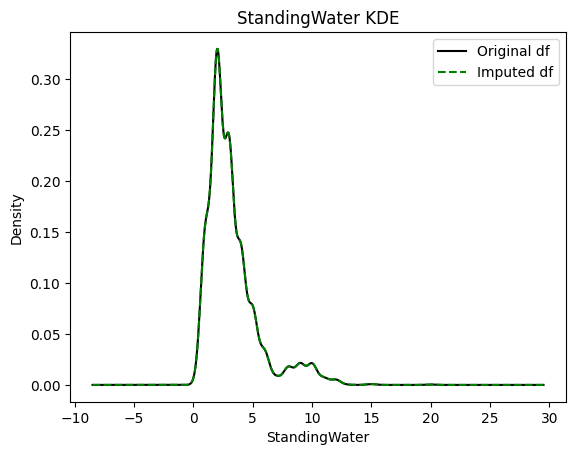

In [17]:
impute_checker("StandingWater", df, "StandingWater KDE")

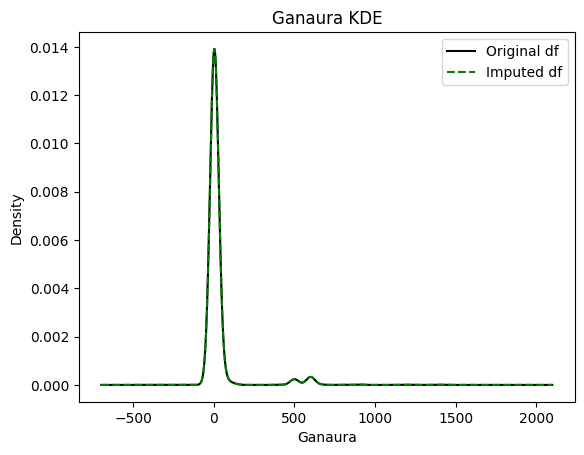

In [18]:
impute_checker("Ganaura", df, "Ganaura KDE")

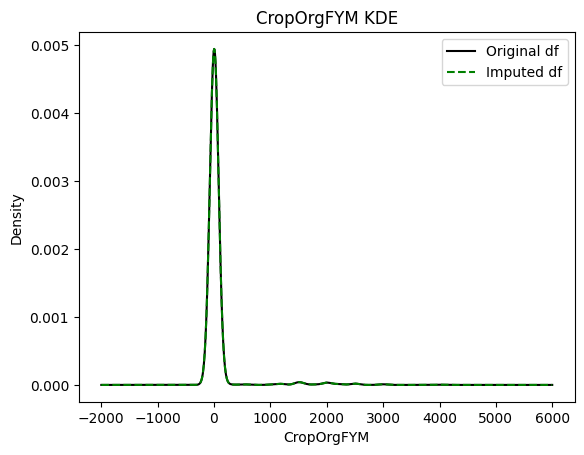

In [19]:
impute_checker("CropOrgFYM", df, "CropOrgFYM KDE")

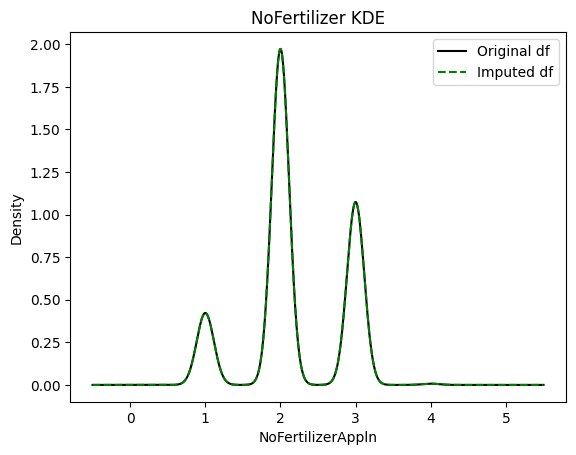

In [20]:
impute_checker("NoFertilizerAppln", df, "NoFertilizer KDE")

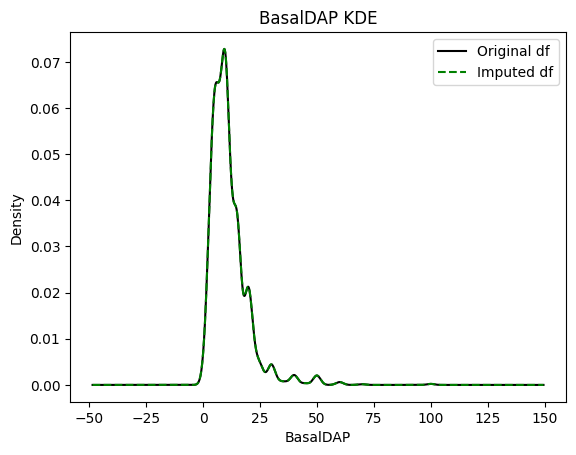

In [21]:
impute_checker("BasalDAP", df, "BasalDAP KDE")

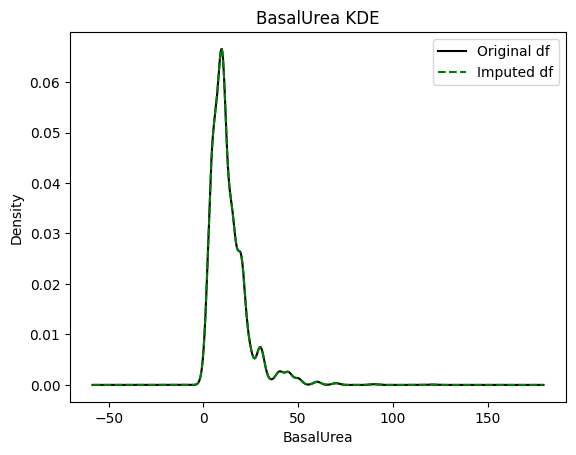

In [22]:
impute_checker("BasalUrea", df, "BasalUrea KDE")

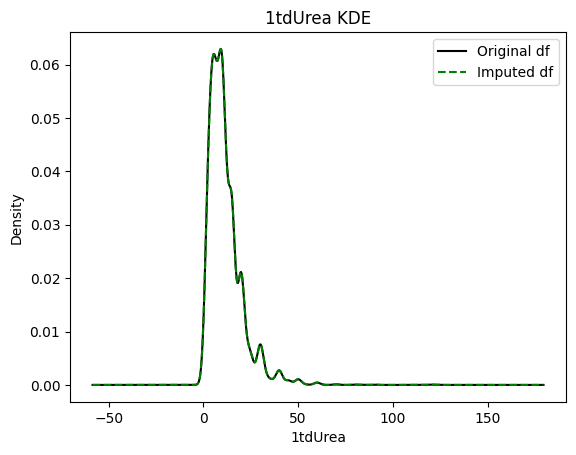

In [23]:
impute_checker("1tdUrea", df, "1tdUrea KDE")

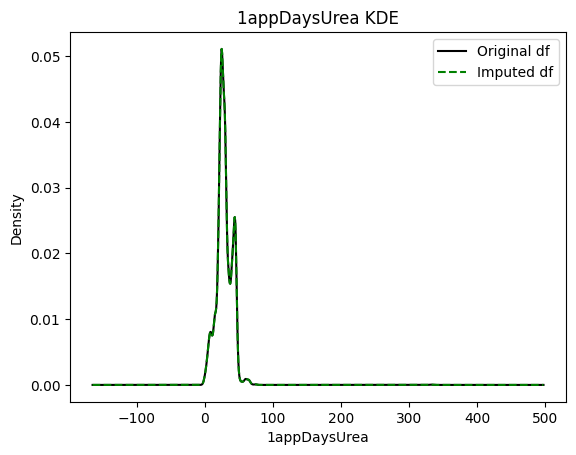

In [24]:
impute_checker("1appDaysUrea", df, "1appDaysUrea KDE")

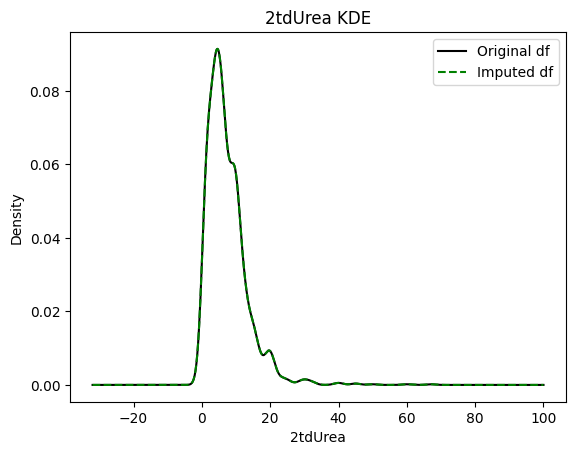

In [25]:
impute_checker("2tdUrea", df, "2tdUrea KDE")

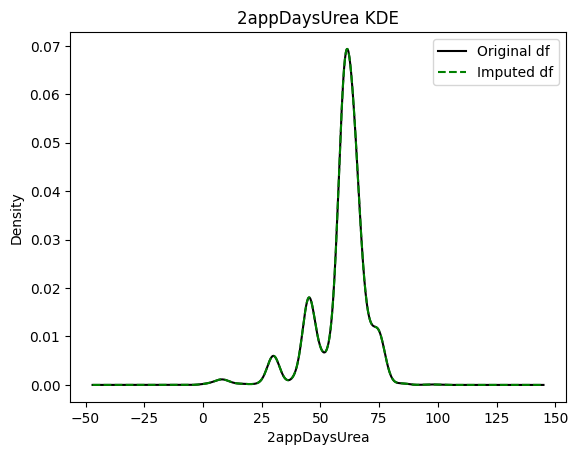

In [26]:
impute_checker("2appDaysUrea", df, "2appDaysUrea KDE")

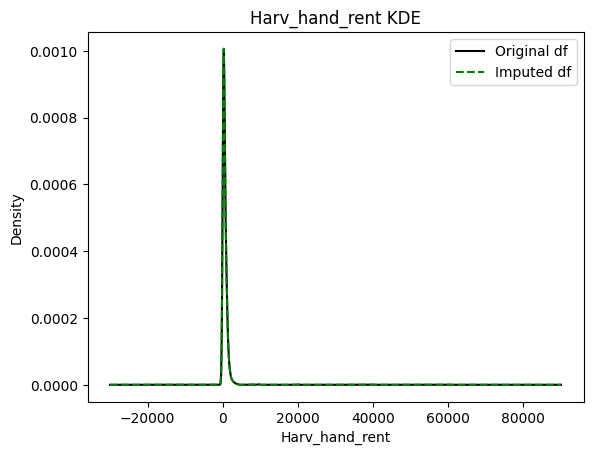

In [27]:
impute_checker("Harv_hand_rent", df, "Harv_hand_rent KDE")

Imputing with mean seems a nice approach 

In [41]:
cat_columns = ["NursDetFactor","TransDetFactor","TransplantingIrrigationSource",
               "TransplantingIrrigationPowerSource","OrgFertilizers","PCropSolidOrgFertAppMethod",
               "CropbasalFerts","FirstTopDressFert"]

for col in cat_columns:
     data[col].fillna(data[col].mode()[0],inplace=True)

In [39]:
numerical_columns =["SeedlingsPerPit","TransplantingIrrigationHours","TransIrriCost",
                    "StandingWater","Ganaura","CropOrgFYM","NoFertilizerAppln","BasalDAP",
                    "BasalUrea","1tdUrea","1appDaysUrea","2tdUrea","2appDaysUrea","Harv_hand_rent"]

for col in numerical_columns:
     data[col].fillna(data[col].mean(),inplace=True)

In [44]:
data["RcNursEstDate"].fillna(data["RcNursEstDate"].mode()[0],inplace=True)

In [45]:
data["RcNursEstDate"].isnull().sum()

0

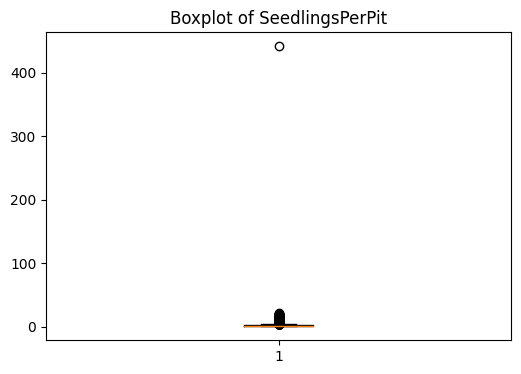

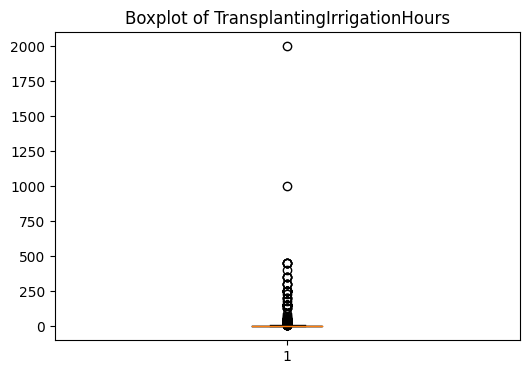

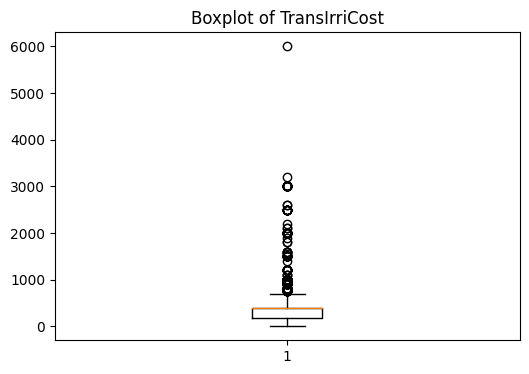

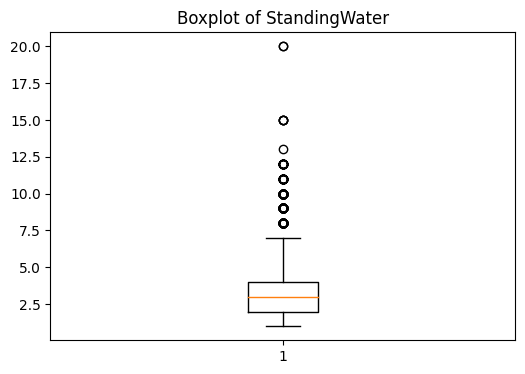

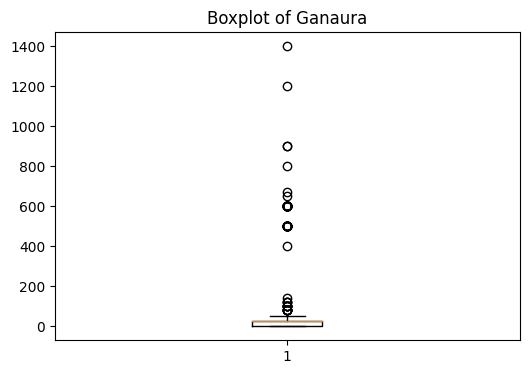

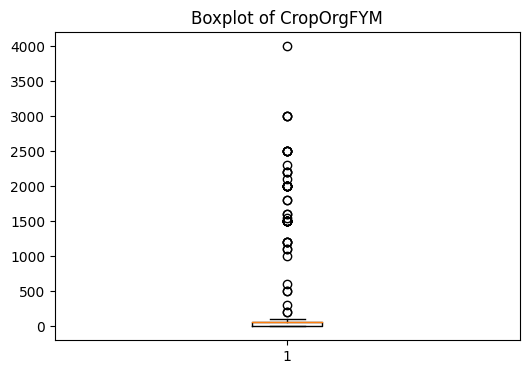

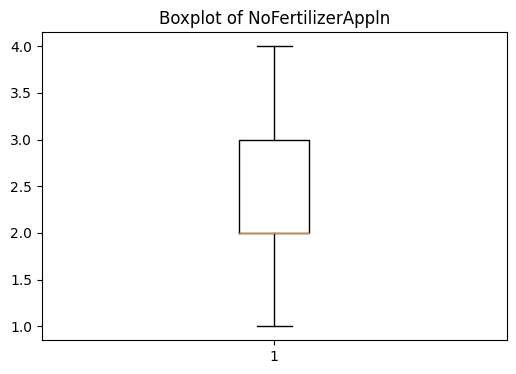

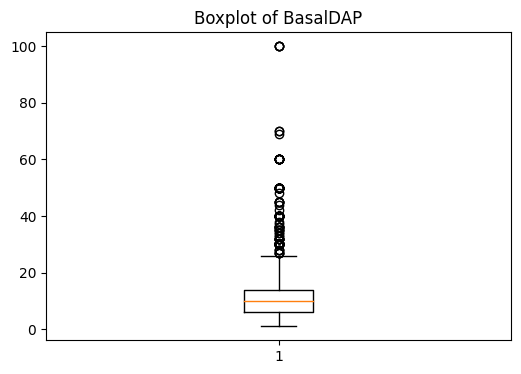

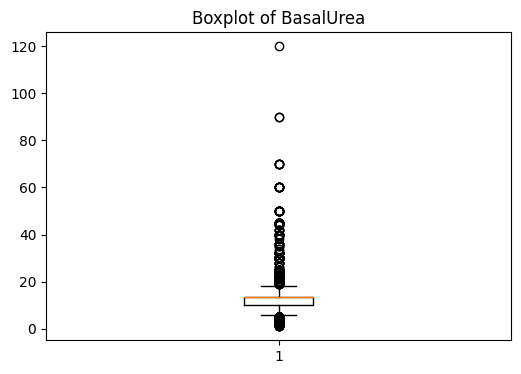

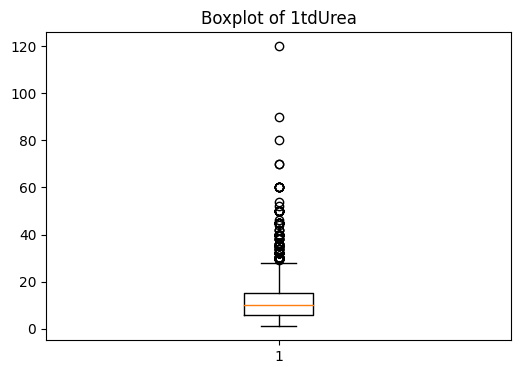

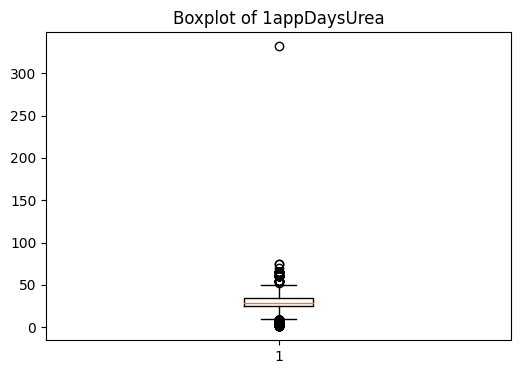

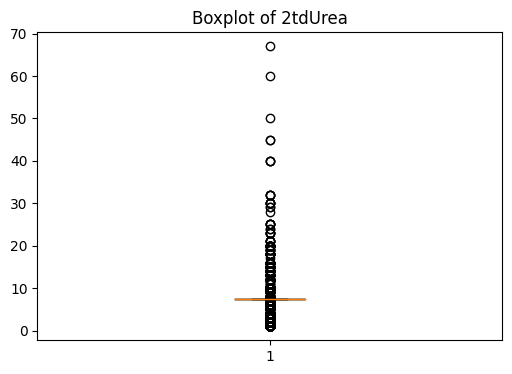

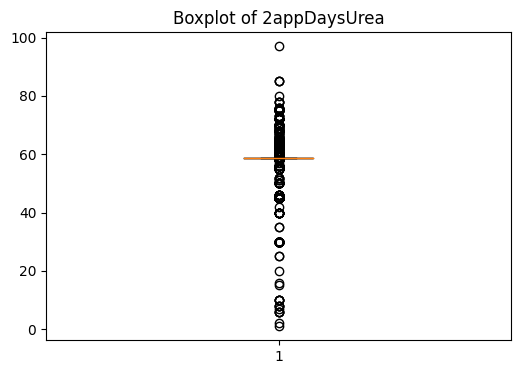

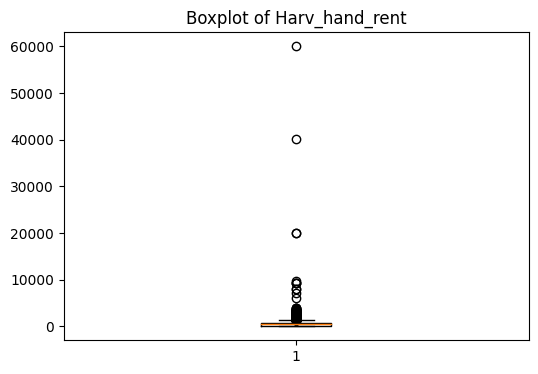

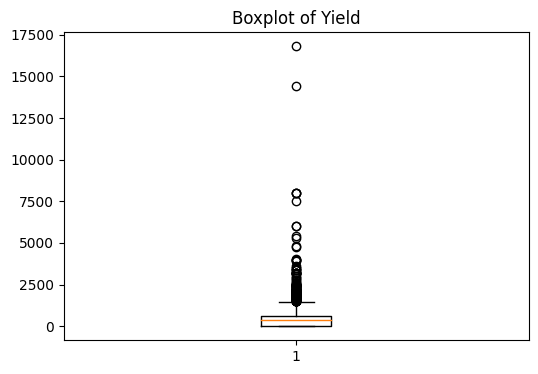

In [52]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [55]:
def impute_outliers_with_mean(data, threshold):
   
    imputed_df = data.copy()
    
    for column in numerical_columns:
        mean = data[column].mean()
        std_dev = data[column].std()
        z_scores = (data[column] - mean) / std_dev
      
        imputed_df[column][z_scores.abs() > threshold] = mean
    
    return imputed_df

threshold = 3

df_without_outliers = impute_outliers_with_mean(data, threshold)

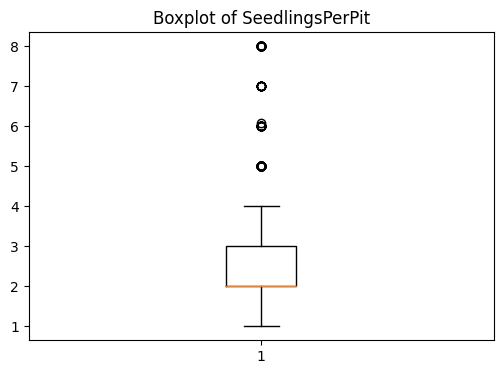

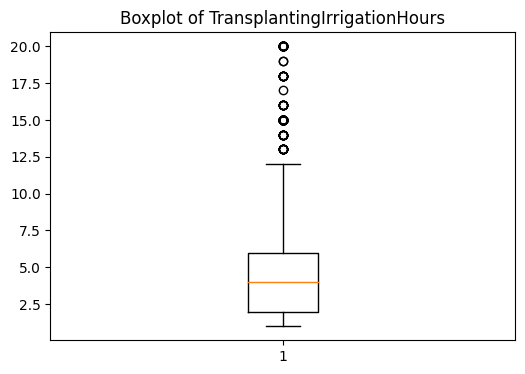

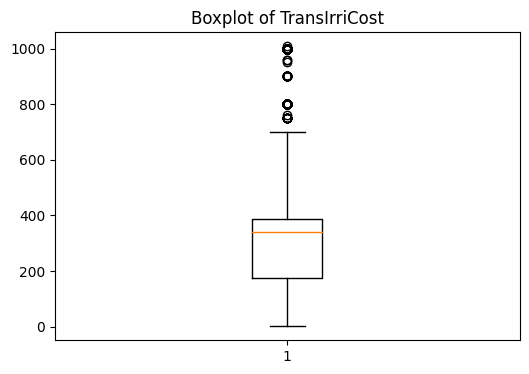

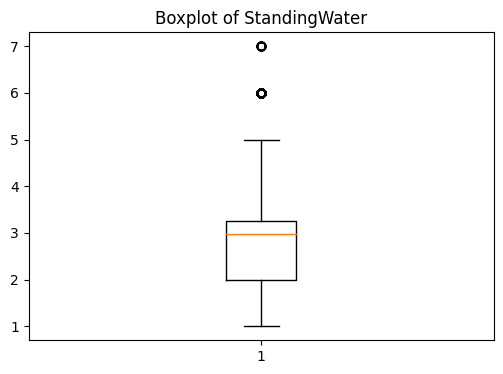

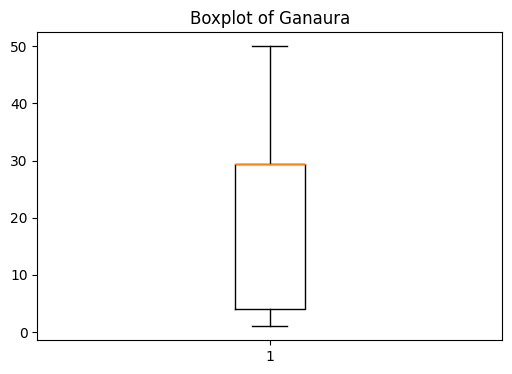

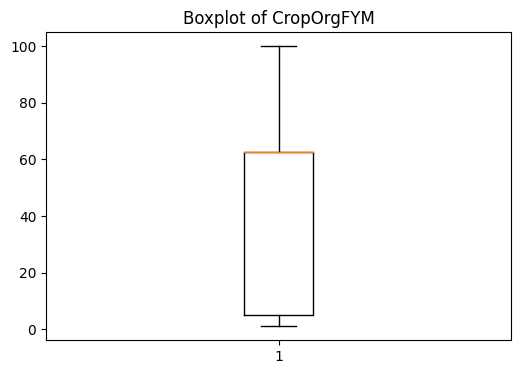

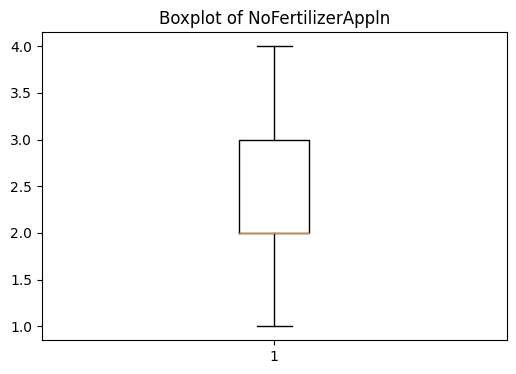

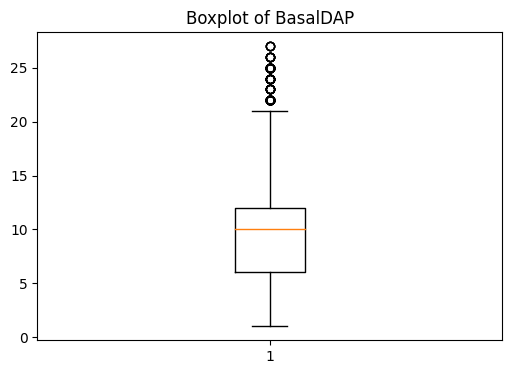

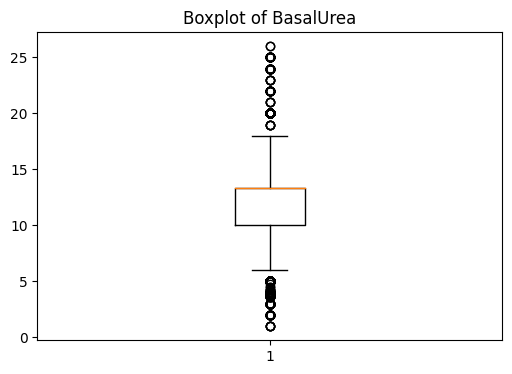

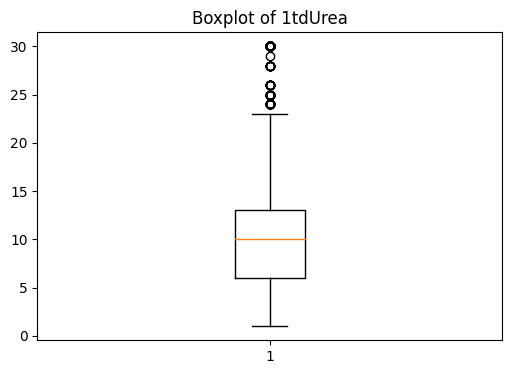

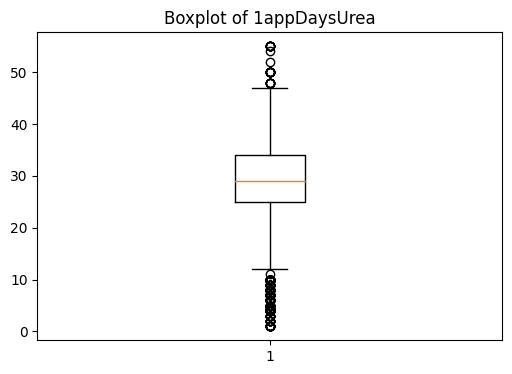

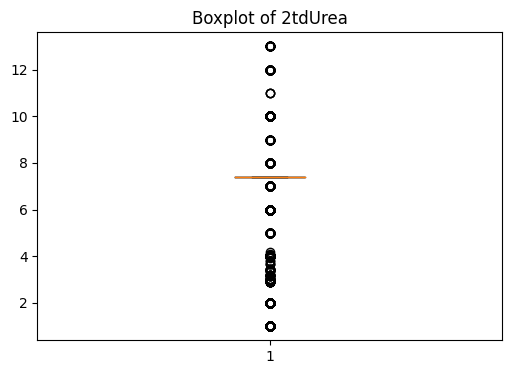

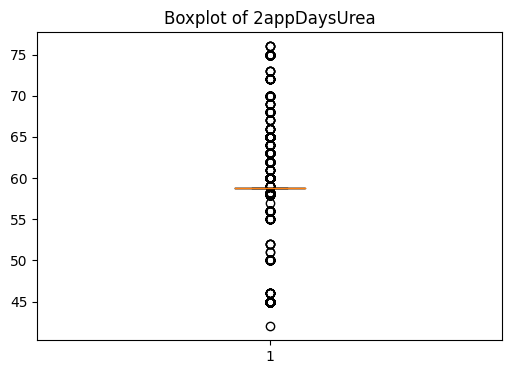

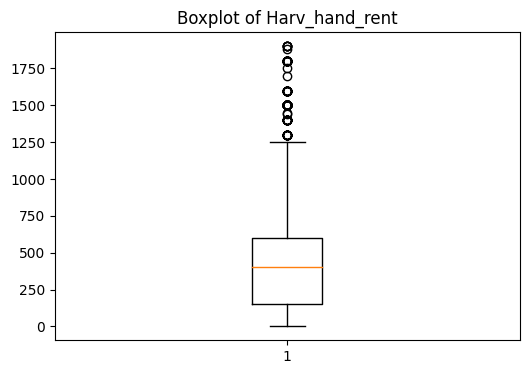

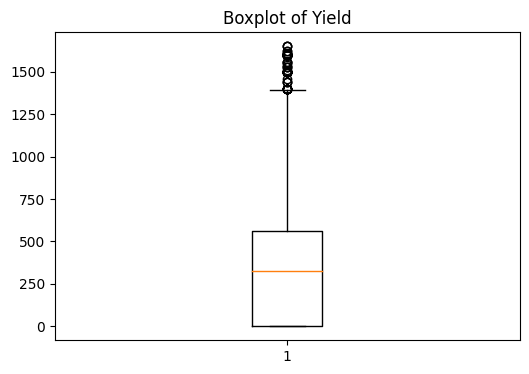

In [56]:
data = df_without_outliers.copy()

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [58]:
def impute_outliers_with_mean_iqr(data, numerical_columns):
    
    imputed_df = data.copy()
    
    for column in numerical_columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        
        imputed_df[column][outliers] = data[column].mean()
    
    return imputed_df

threshold = 1.5

# Impute outliers with the mean using IQR
df_without_outlier = impute_outliers_with_mean_iqr(data, numerical_columns)

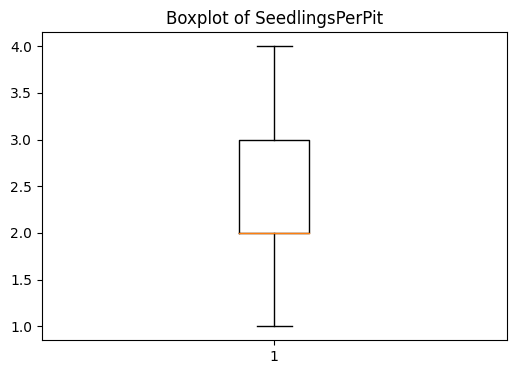

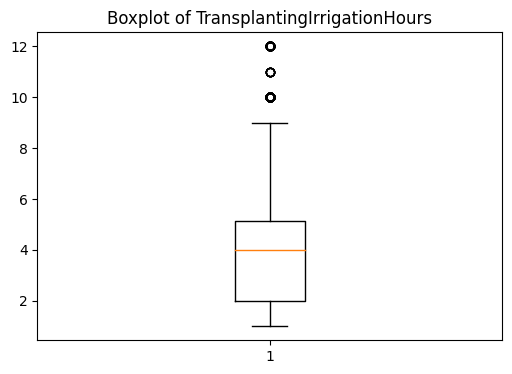

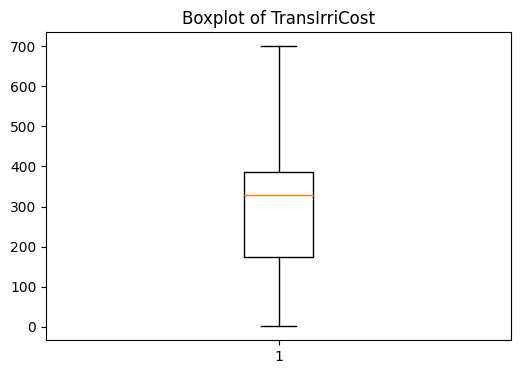

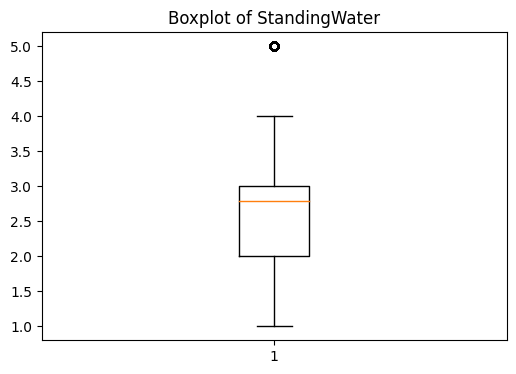

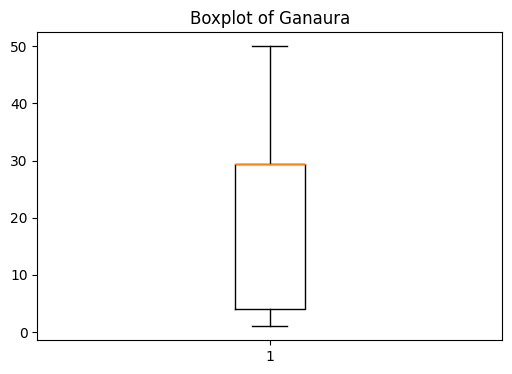

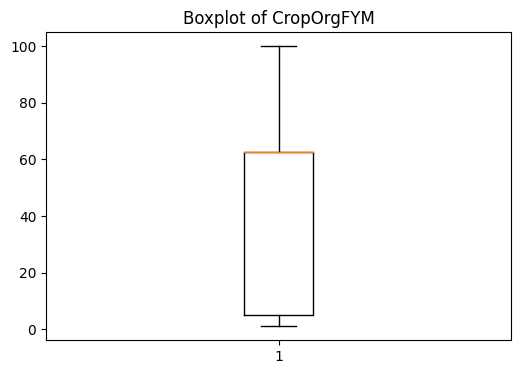

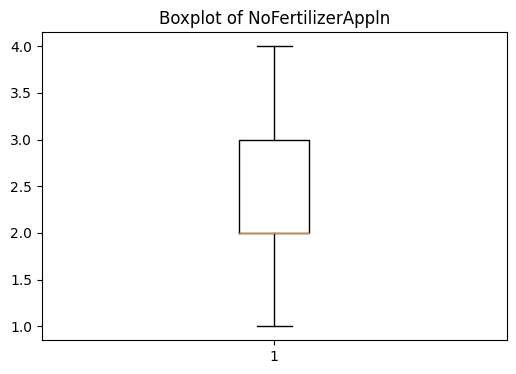

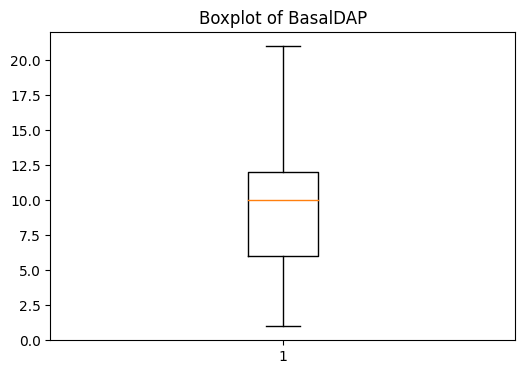

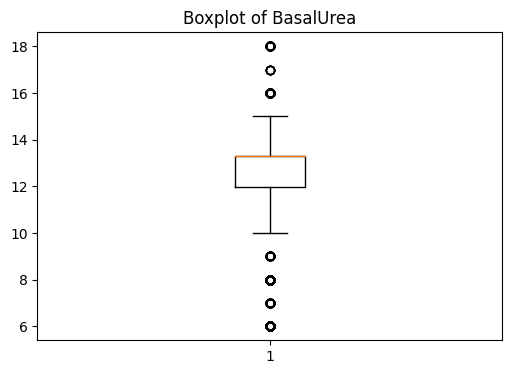

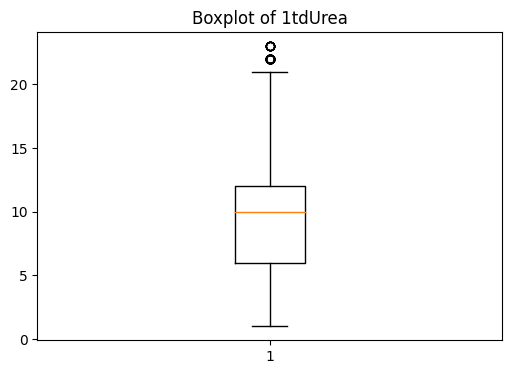

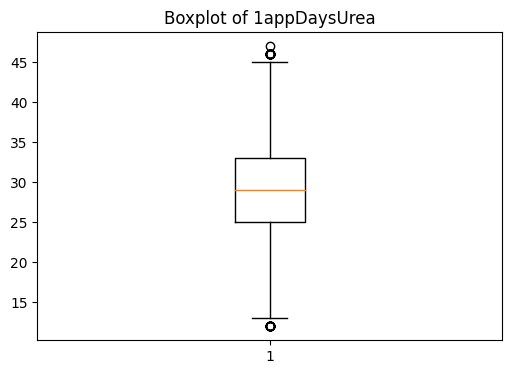

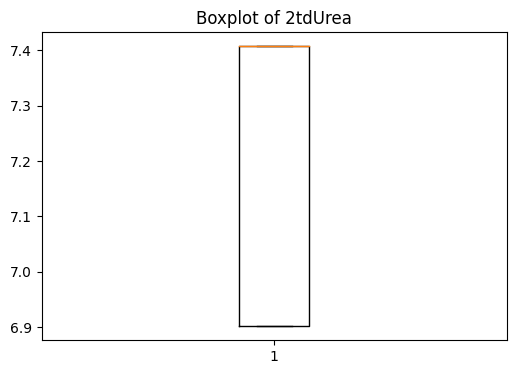

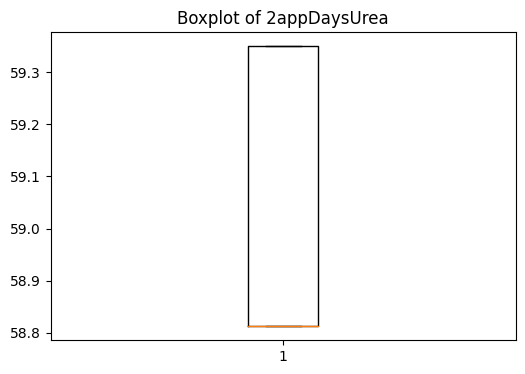

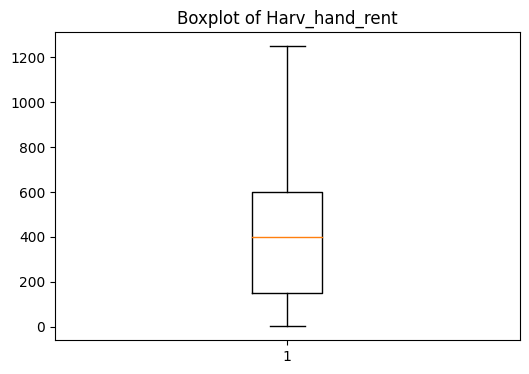

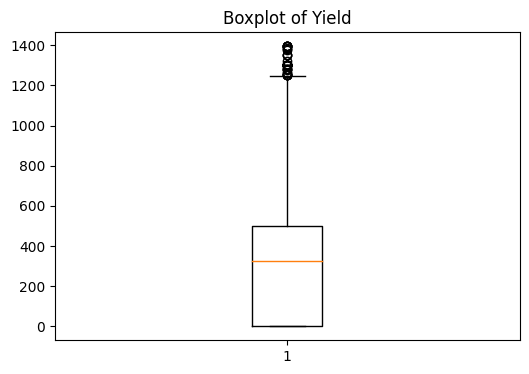

In [60]:
df = df_without_outlier.copy()

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Which approach should we use in handling outliers?